In [108]:

# Inputs

V = 150 # L
V_c=10 # L
H_r = -2E5 # cal/mol
UA=7E5 # cal/min/k
k_0=7.2E10 # min^-1
a=1 # -
b=1 # -

n=1 # -
C_p=1 #cal/g/k
rho=1000 # g/L 
rho_c = 1000 # g/L
C_pc=1 # cal/g/K

# I'm not sure what these values should be....
Q_c=150 # L/min
Q=100 # L/min

# Inlet conditions (I get a feeling that these could also change over time)
C_i= 1 # mol/L
T_ci=350 # K
T_i=350; #K 



In [109]:
H_r

-200000.0

In [174]:
using DifferentialEquations
using Noise
using Plots

function cstr_equations!(du,u,p,t)
    
 C_i, T_i, T_ci = p
 E_over_R = 1E4 # K
 
k = k_0*exp(−E_over_R/400)
    
C = u[1]
    T=u[2]
    T_c = u[3]
    
 du[1] = (Q/V)*(C_i-C) - a*k*C
 du[2] = (Q/V)*(T_i-T) - a*H_r*k*C/(rho*C_p) - b*UA*(T-T_c)/(rho*C_p*V)
 du[3] = (Q_c/V_c)*(T_ci - T_c) + b*UA * (T-T_c)/(rho_c*C_pc*V_c)
end

cstr_equations! (generic function with 1 method)

In [175]:
function step_change(min,max,diff)

 return rand(min:diff:max)

end

step_change (generic function with 2 methods)

In [176]:
input_change_times = 60:60:240
condition(u,t,integrator) = t ∈ input_change_times
function affect!(integrator)
    integrator.p[1] = step_change(0.9,1.1, 0.01)
    integrator.p[2] = step_change(345, 355,0.1)
    integrator.p[3] = step_change(345, 355,0.1)
    print(integrator.p)
end
cb = DiscreteCallback(condition,affect!);


In [177]:

# Initial conditions...
u0 = [0.1;440.0;410.0]

# Timespan that we are looking 
tspan = (0.0,240.0)
p = [0.98, 352, 352]

prob = ODEProblem(cstr_equations!,u0,tspan, p,dt=0.0001)
sol = solve(prob,Euler(),callback=cb,tstops=input_change_times);
#plot(sol)

[1.1, 355.0, 350.0][0.99, 350.9, 347.0][1.06, 349.3, 349.6][1.09, 350.4, 355.0]

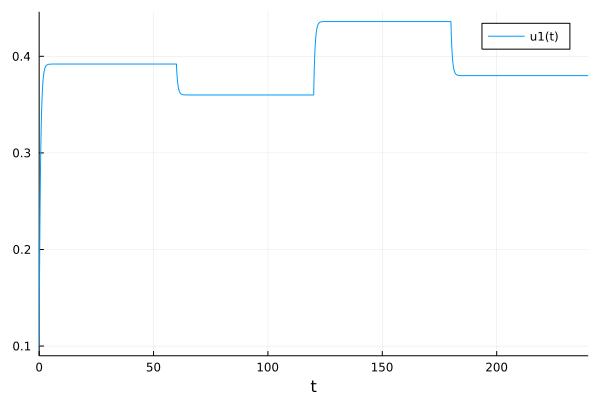

In [172]:
plot(sol, vars=(0,1))

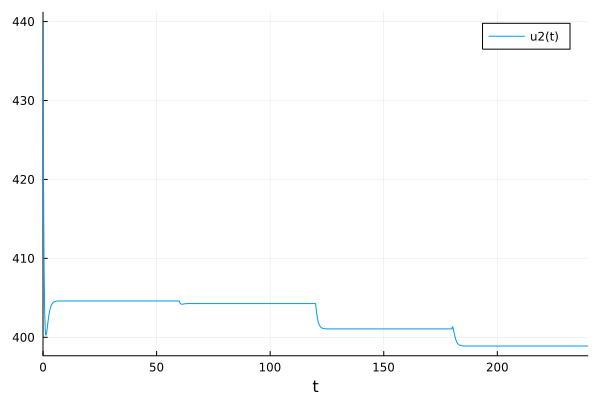

In [147]:
plot(sol, vars=(0,2))

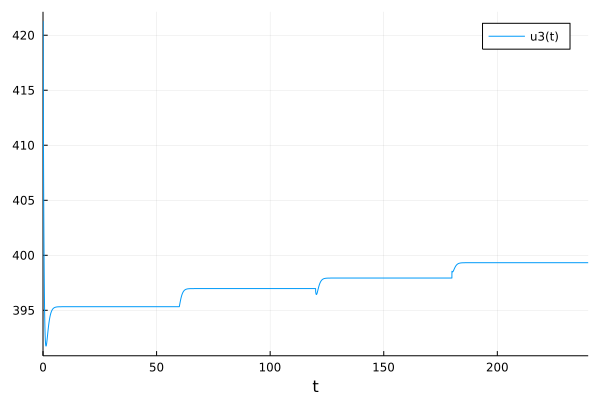

In [138]:
plot(sol, vars=(0,3))

In [35]:
sol.t

5466-element Vector{Float64}:
   0.0
   0.005731259223589683
   0.012137529626595195
   0.012824772276431057
   0.013119210936918533
   0.01361873285034288
   0.013869978743297514
   0.013987382645252889
   0.014096690979377154
   0.014189856866245678
   0.014286122814247525
   0.014379483727188664
   0.01447777838611293
   ⋮
 199.57439009223162
 199.6139773052732
 199.65356451674174
 199.69315173188073
 199.7327389506902
 199.7723261679266
 199.81191338096818
 199.8515005924367
 199.8910878075757
 199.93067502638516
 199.9702622409998
 200.0